Nous allons utiliser les données concernant les caractéristiques physico-chimiques de vins blancs portugais disponibles sur l'archive UCI. Il s'agit ici de prédire le score (entre 3 et 9) donné par des experts aux différents vins.

In [15]:
import pandas as pd
import numpy

In [4]:
data = pd.read_csv('winequality-white.csv', sep = ";")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [18]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=1)
pca.fit(data)

PCA(n_components=1)

In [19]:
print(pca.explained_variance_ratio_) #information véhiculée
print(pca.components_) #vecteur propre

[0.90933123]
[[ 1.54452453e-03  1.69030937e-04  3.38646756e-04  4.73275083e-02
   9.75793989e-05  2.61872279e-01  9.63853329e-01  3.59706391e-05
   3.36199734e-06  3.40888191e-04 -1.25043553e-02 -3.28041170e-03]]


Le nouveau vecteur explique 91% des informations.

In [53]:
U = numpy.transpose(pca.components_) # vecteurs propres
C = pd.DataFrame(data.dot(U)) # nouvelles coordonnées
I = pd.DataFrame(pca.explained_variance_ratio_)  # information véhiculée

correlations = pd.DataFrame([[C[facteur].corr(data[column]) for facteur in C] for column in data], index=data.columns)
correlations

,0
fixed acidity,0.080440
volatile acidity,0.073702
citric acid,0.122982
residual sugar,0.410091
chlorides,0.196290
free sulfur dioxide,0.676721
total sulfur dioxide,0.996765
density,0.528563
pH,0.000979
sulphates,0.131274


Le vecteur se base principalement sur "total sulfur dioxide", mais on remarque que la densité et "free sulfur dioxide" ont un rôle important dans la construction du vecteur. Plus précisément, ci-dessous :

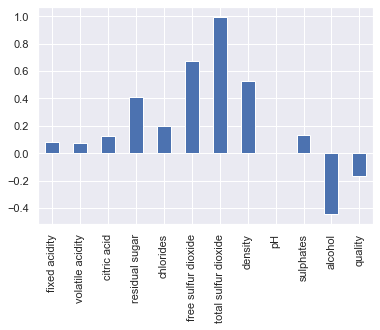

In [28]:
import matplotlib.pyplot as plt

correlations[0].plot.bar()

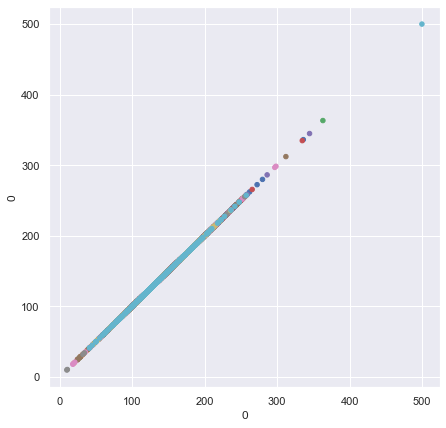

In [72]:
import seaborn as sns
sns.set()
current_palette = sns.color_palette()
colors = [current_palette[i] for i in range(10)] #car il y a 10 scores possibles
colors_by_quality = [colors[i // 500] for i in range(len(data))]

fig, ax = plt.subplots(figsize=(7, 7)) 

C.plot.scatter(0, 0, color=colors_by_quality, ax=ax)

plt.show() 

Essayons de voir la nouvelle représentation avec deux axes

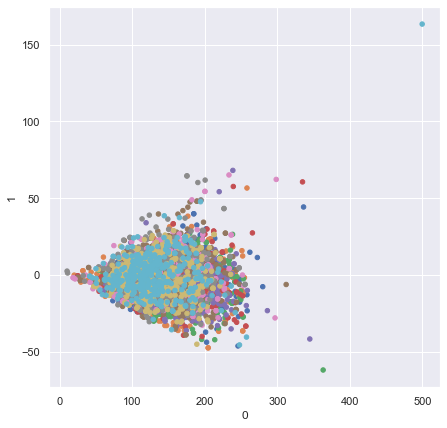

In [73]:
pca = PCA(n_components=2)
pca.fit(data)
U = numpy.transpose(pca.components_) # vecteurs propres
C = pd.DataFrame(data.dot(U)) # nouvelles coordonnées
I = pd.DataFrame(pca.explained_variance_ratio_)  # information 


fig, ax = plt.subplots(figsize=(7, 7)) 

C.plot.scatter(0, 1, color=colors_by_quality, ax=ax)

plt.show() 

Essayons de voir la nouvelle représentation avec trois axes

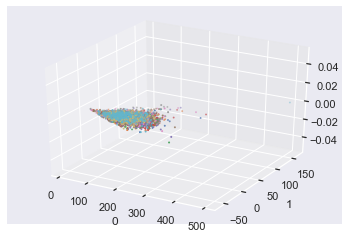

In [62]:
pca = PCA(n_components=3)
pca.fit(data)
U = numpy.transpose(pca.components_) # vecteurs propres
C = pd.DataFrame(data.dot(U)) # nouvelles coordonnées
I = pd.DataFrame(pca.explained_variance_ratio_)  # information 


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
C.plot.scatter(0, 1, 1, color=colors_by_quality, ax=ax)
plt.show() 

Le troisième axe n'apporte pas à la réprésentation car il explique peu d'information.

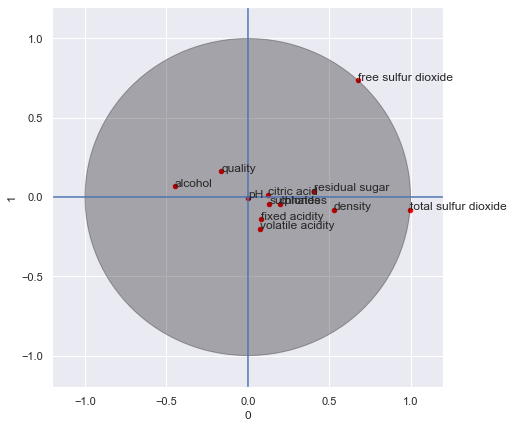

In [76]:
pca = PCA(n_components=2)
pca.fit(data)
U = numpy.transpose(pca.components_) # vecteurs propres
C = pd.DataFrame(data.dot(U)) # nouvelles coordonnées
I = pd.DataFrame(pca.explained_variance_ratio_)  # information 
correlations = pd.DataFrame([[C[facteur].corr(data[column]) for facteur in C] for column in data], index=data.columns)

fig, ax = plt.subplots(figsize=(7, 7)) 

draw = correlations.plot.scatter(x=0, y=1, ax=ax, color="red")


for index, row in correlations.iterrows():
    draw.annotate(str(index), (row[0], row[1]))

draw.add_patch(plt.Circle((0, 0), radius=1, color=(0, 0, 0, .3)))

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.axvline(0)
plt.axhline(0)

plt.show()

Ici on voit bien que le deuxième axe n'est influencé que par un élément le "free sulfur dioxide"